# Análise Exploratória de Dados - Consumidor.gov



#### Perguntas a serem respondidas:

- Como é a distribuição das reclamações pelo país?
- Quais os segmentos com maior número de reclamações?
- Qual o perfil dos reclamantes?
- Qual o tempo médio de resposta por segmento?
- Quais as empresas com mais reclamações e sua nota média de avaliação dos clientes?
- Há relação entre a nota de avaliação e o tempo de resposta?

#### Leitura dos dados

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados/base_final.csv')

In [3]:
df.head()

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,grupo_problema,como_comprou_contratou,procurou_empresa,situacao,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Não comprei / contratei,S,Finalizada não avaliada,Não Avaliada,0.0
1,BA,F,entre 31 a 40 anos,10.0,iFood,Empresas de Intermediação de Serviços / Negócios,Entrega do Produto,Internet,S,Finalizada não avaliada,Não Avaliada,0.0
2,BA,F,entre 51 a 60 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Telefone,S,Finalizada não avaliada,Não Avaliada,0.0
3,PE,F,entre 61 a 70 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Loja física,S,Finalizada não avaliada,Não Avaliada,0.0
4,PE,F,entre 51 a 60 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Loja física,S,Finalizada não avaliada,Não Avaliada,0.0


### Análises

In [6]:
# verificando os tipos de dados do dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272347 entries, 0 to 272346
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   uf                      272347 non-null  object 
 1   sexo                    272347 non-null  object 
 2   faixa_etaria            272347 non-null  object 
 3   tempo_resposta          272347 non-null  float64
 4   nome_fantasia           272347 non-null  object 
 5   segmento_de_mercado     272347 non-null  object 
 6   grupo_problema          272347 non-null  object 
 7   como_comprou_contratou  272347 non-null  object 
 8   procurou_empresa        272347 non-null  object 
 9   situacao                272347 non-null  object 
 10  avaliacao_reclamacao    272347 non-null  object 
 11  nota_do_consumidor      272347 non-null  float64
dtypes: float64(2), object(10)
memory usage: 24.9+ MB


In [7]:
df.describe()

,tempo_resposta,nota_do_consumidor
count,272347.000000,272347.000000
mean,6.327156,1.257701
std,3.040102,1.853561
min,0.000000,0.000000
25%,4.000000,0.000000
50%,7.000000,0.000000
75%,9.000000,1.000000
max,11.000000,5.000000


#### Emissões por estado

In [8]:
emissoes_estado = df['uf'].value_counts().reset_index()
emissoes_estado.columns = ['estado', 'num reclamações']

total_reclamacoes = len(df)
emissoes_estado['percentual reclamações'] = (emissoes_estado['num reclamações']/total_reclamacoes) * 100
#df.groupby('uf').size().sort_values(ascending=False)

emissoes_estado

,estado,num reclamações,percentual reclamações
0,SP,58474,21.470404
1,MG,31200,11.455973
2,RJ,28851,10.593471
3,PR,22382,8.218192
4,BA,15930,5.849156
5,RS,13982,5.133892
6,DF,13566,4.981145
7,SC,12888,4.732198
8,GO,9351,3.433487
9,CE,8541,3.136073


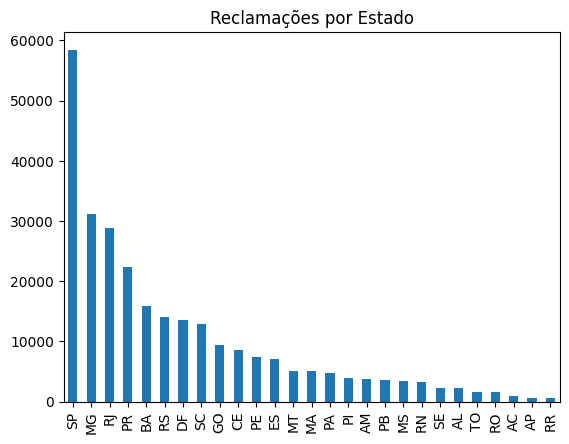

In [4]:
df['uf'].value_counts().plot.bar()
plt.title('Reclamações por Estado')
plt.xlabel(None)
plt.show()

#### Emissões por segmento

In [30]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,grupo_problema,como_comprou_contratou,procurou_empresa,situacao,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Não comprei / contratei,S,Finalizada não avaliada,Não Avaliada,0.0


In [ ]:
emissoes_segmento = df['segmento_de_mercado'].value_counts().reset_index()
emissoes_segmento.columns = ['segmento', 'num reclamações']

emissoes_segmento['percentual reclamações'] = (emissoes_segmento['num reclamações']/total_reclamacoes) * 100

emissoes_segmento

In [7]:
# Supondo que 'df' seja o nome do seu DataFrame
# Substitua 'nome_empresa' e 'num_reclamacoes' pelos nomes reais das suas colunas
top_10_empresas = df['segmento_de_mercado'].value_counts().nlargest(10).reset_index()
top_10_empresas.columns = ['segmento', 'num reclamações']
print(top_10_empresas)


                                            segmento  num reclamações
0    Bancos, Financeiras e Administradoras de Cartão            80261
1  Operadoras de Telecomunicações (Telefonia, Int...            35211
2                                Comércio Eletrônico            20000
3                                   Transporte Aéreo            17843
4                                   Energia Elétrica            13206
5               Seguros, Capitalização e Previdência            10340
6  Provedores de Conteúdo e Outros Serviços na In...             9832
7                   Empresas de Pagamento Eletrônico             9546
8   Empresas de Intermediação de Serviços / Negócios             9084
9                            Programas de Fidelidade             8812
